<a href="https://colab.research.google.com/github/ShailendraSSY/Neural-Network/blob/master/M2_AST_12_Image_Classification_(CIFAR_10)_SVM_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 12: Image Classification (CIFAR-10) using Support Vector Machines

## Learning Objectives

At the end of the experiment, you will be able to:

* understand CIFAR-10 dataset
* understand the SVM Linear Classifier
* perform Binary-Classification using SVM Linear Classifier on CIFAR-10 dataset
* extract features using HOG (Histogram of Oriented Gradients) Method
* perform Binary-Classification using SVM Linear Classifier on HOG features
* perform Multi-class Classification using RBF kernel

## Dataset

#### Description

In this experiment, we will use the CIFAR-10 dataset. It consists of 60,000 colour images(32x32) in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images.


The dataset is divided into five training batches and one test batch where each batch has 10000 images. The test batch contains 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

Here are the classes in the dataset, as well as 10 random images from each:


<img src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Images/CIFAR10.png" alt="Drawing" height="350" width="440"/>

**The code returns the contents of each data file as a dictionary**.

There are 8 pickled files in the CIFAR-10 directory.

    1. batches.meta

    2. data_batch_1

    3. data_batch_2	

    4. data_batch_3

    5. data_batch_4	

    6. data_batch_5

    7. readme.html

    8. test_batch

Getting into details of this dataset:


**data**: A 50,000x3072 numpy array of unsigned integers. Each row of the array stores a 32x32 colour image. The first 1024 intensity values contain the red channel values, the next 1024 intensity values contain the green channel, and the final 1024 the blue channel. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image. 


**labels**: A list of 10,000 numbers from 0-9 (for the above mentioned classes airplane, automobile etc..). The number at index i indicates the label of the ith image in the array data.



The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:

**label_names:**  A 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.



### DataSource

https://www.cs.toronto.edu/~kriz/cifar.html

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2200023" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9910549998" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "M2_AST_12_Image_Classification_(CIFAR-10)_SVM_C" #name of the notebook

def setup():

    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/DS_CIFAR-10_STD.zip")
    ipython.magic("sx unzip DS_CIFAR-10_STD.zip")
    # ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Iris.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages


In [4]:
# Importing required packages
import numpy as np                    # basic library to work with arrays
import seaborn as sns                 # library for statistical data visualization
import pickle
import matplotlib.pyplot as plt       # basic library for plotting graphs and visualization
from sklearn.svm import SVC           # importing Support vector classifier

# importing confusion matrix, accuracy score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Function to unpickle the data

In [5]:
# Function to unpickle the data files which is in the dictionary format
def unpickle(file):
    with open(file, 'rb') as fo:
        # Setting the encoding to latin1 allows to import the data directly
        dict_1 = pickle.load(fo, encoding='Latin1')
    return dict_1

When we pass a pickled file to the get_data function it returns features, labels, file names, list of classes of the corresponding file.

In [6]:
def get_data(file):
    
    # Unpickle the data file
    dict_1 = (unpickle(file))

    # Storing the features
    X = dict_1['data']

    # Storing the labels
    Y = np.asarray(dict_1['labels'])

    # Storing the .png files of images
    file_names = dict_1['filenames']

    # Get the class names 
    list_class = (unpickle("DS_CIFAR-10_STD/batches.meta")['label_names'])

    return X, Y, file_names, list_class

### Visualizing the images in CIFAR-10 Dataset


In [7]:
# Read 10000 images -- from data_batch 3 by passing the file to 'get_data' function
X, Y, names, classes = get_data("DS_CIFAR-10_STD/data_batch_3")

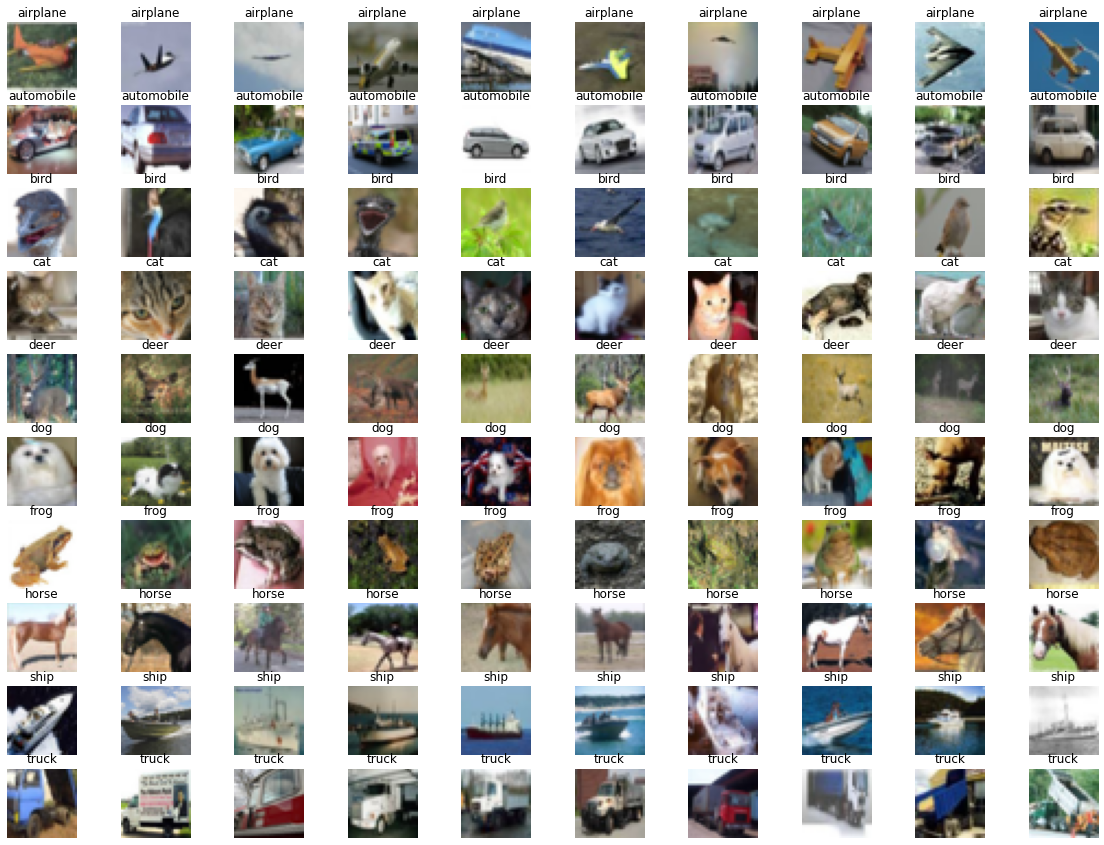

In [8]:
fig = plt.figure(figsize=(20, 15))
plt_id = 1
# Plotting the images by selecting the first 10 images from the 10 classes in the dataset
for label in range(10):
  for idx, image_id in enumerate(np.where(Y==label)[0][:10], start=1):
    plt.subplot(10, 10, plt_id)
    # Reshape the images with height x width x channels
    img = X[image_id].reshape(3, 32, 32).transpose([1, 2, 0])
    plt.title(classes[Y[image_id]])
    plt.imshow(img)
    plt.axis("off")
    plt_id += 1
plt.show()

### Support Vector Machine - Classification (SVC)

#### What is SVM?

Support vector machines are supervised learning models used for classification and regression analysis. A simple linear SVM classifier works by making a straight line between two classes. That means all of the data points on one side of the line will represent a category and the data points on the other side of the line will be put into a different category. This means there can be an infinite number of lines to choose from.

**Hyperplanes** are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes.
 * The hyperplane with maximum margin is called the optimal hyperplane.

#### What are support vectors?

* Linear SVM assumes that the data is linearly separable.

* It chooses the line which is more distant from both the classes.

In the SVM algorithm, we find the points closest to the line from both the classes. These points are called support vectors. 

**Support vectors** are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Then compute the distance between the line and the support vectors which is called the margin.

**Margin** is the width that the boundary could be increased by before hitting a data point.



![alt text](https://cdn.talentsprint.com/aiml/aiml_2020_b14_hyd/experiment_details_backup/linear_data.png)


### Let us define a function for training the Linear Support Vector Classifier

For more details on SVM refer to the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [9]:
def train(train_features, train_labels):
    
    # Create an instance for the LinearSVC classifier
    clf = SVC(kernel='linear', random_state=0, max_iter=1000)

    # Fitting the data into the model
    clf.fit(train_features, train_labels)

    return clf

### Let us define a function to get the prediction on the test set

In [10]:
def predict(clf, test_features):
    
    # Get the prediction on the test data
    predictions = clf.predict(test_features)

    return predictions

### Let us define a function to calculate accuracy score

In [11]:
def eval(predictions, test_labels):   
    return accuracy_score(predictions, test_labels)

###  Let us unpickle the data and labels from CIFAR-10

Now let us unpickle the data and labels from CIFAR-10 dataset and divide them into training and testing sets..

In [12]:
train_features = []
train_labels = []

# Read all training features and labels from all the data_batch files
for j in "12345": 
    batch_file = 'DS_CIFAR-10_STD/data_batch_'+ j
    x_train, y_train, names_train, classes_train = get_data(batch_file)
    train_features.extend(x_train)
    train_labels.extend(y_train)

# Converting the train features and labels in to an array
train_features = np.asarray(train_features)
train_labels = np.asarray(train_labels)

# Read all test features and labels
test_features, test_labels, names_test, classes_test = get_data("DS_CIFAR-10_STD/test_batch")

# Converting the test features and labels in to an array
test_features = np.asarray(test_features)
test_labels = np.asarray(test_labels)

In [13]:
test_labels.shape, train_labels.shape, test_features.shape, train_features.shape

((10000,), (50000,), (10000, 3072), (50000, 3072))

### Let us define a function to extract two classes to perform binary classification


In [14]:
# Function to extract 2 classes to perfrom SVM Linear classification 
def pick_2classes(class0, class1, X, Y):

    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]

    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]

    # Join the two classes (vertically row wise) to make the set
    X_classes = np.vstack((X_0, X_1))
    Y_classes = np.append(Y_0, Y_1)

    return X_classes, Y_classes

In [15]:
# Select the classes #7 and #8 for training and testing the data to get the features
# The class 7 belongs to 'horse' and class 8 belongs to 'ship'
X_train_data, Y_train_data = pick_2classes(7, 8, train_features, train_labels)
X_test_data, Y_test_data = pick_2classes(7, 8, test_features, test_labels)

In [16]:
# Check the shape of train and test data sets
X_train_data.shape, Y_train_data.shape, X_test_data.shape, Y_test_data.shape

((10000, 3072), (10000,), (2000, 3072), (2000,))

In [17]:
# Call the 'train' function with the train data
trained_clf = train(X_train_data, Y_train_data)

# Call the 'predict' function by paasing the trained classifier and the test data
predictions = predict(trained_clf, X_test_data)

# Calculate the accuracy by passing the predictions and the test labels
accuracy = eval(predictions, Y_test_data)

In [18]:
# Print the accuracy score
print('Accuracy score is', accuracy)

Accuracy score is 0.766


**Exercise:** You can also select different class labels 
(0-9) and try passing it to the **pick_2classes** to perform the binary classification using LinearSVM and see the change in accuracy

### Preparing the data to extract the HOG features

In [19]:
# Define a function to reshape the train and test features
def batch_to_rgb(images: np.ndarray) -> np.ndarray:
    """
    Given loaded images from CIFAR-10 dataset (i.e. 32x32 values
    of red, then green and blue), returns same set of images with
    color channel being the last, i.e. batch_to_rgb[n][y][x]
    returns 3-valued array with r, g, b of pixel (x, y) of n-th 
    image. It returns same images with transformed colors to rgb
    
    """
    return images.reshape((-1, 3, 32, 32)).transpose(0, 2, 3, 1)

In [20]:
# Call the function 'batch_to_rgb' on the train and test features
train_features = batch_to_rgb(train_features)
test_features = batch_to_rgb(test_features)
# Check the shape of train features 
print(train_features.shape)

(50000, 32, 32, 3)



### Feature Representation using HOG (Histogram of Oriented Gradients) Method

The histogram of oriented gradients (HOG) is a feature descriptor used in computer vision and image processing for the purpose of object detection. The idea behind HOG is to extract features into a vector, and feed it into a classification algorithm that will assess whether a face (or any object you train it to recognize actually) is present in a region or not.

Feature extraction is the process by which certain features of interest within an image are detected and represented for further processing. The resulting representation can be subsequently used as an input to the classification techniques, which will then classify, or recognize the semantic contents of the image or its objects. 


To identify the objects using HOG method requires the following steps to be followed :-


**What is Gradient Image?**

<img src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Images/Gradient.png" alt="Drawing" height="200" width="460"/>

We start with computing the horizontal and vertical gradients of the image. In the image when we move from left to right pixel by pixel, there might be a change in the pixel value i.e, from a black lower pixel number to a white higher pixel number. Going from left to right gives us the horizontal gradient and going from top to down gives a vertical gradient. This sudden change in the color is called a gradient. 

The gradient image removes a lot of non-essential information (e.g. constant colored background), but highlighted outlines and still we can identify the image. At every pixel, the gradient has a magnitude and a direction.

**Orientation of Gradients**

HOG works with a block which is similar to a sliding window. A block is considered as a pixel grid in which gradients are constituted from the magnitude and direction of change in the intensities of the pixel within the block.

We first calculate the gradients by taking a block from the images. For the selected block, determine the gradient (or change) in the x-direction and aslo calculate the gradient in the y-direction. Once we get the gradients, we will also calculate the gradient magnitude and gradient angle for each pixel (in the image).

**Histogram of Gradients**
    
The next step is to create a histogram of gradients for the block of pixels from the image. We will take each pixel value, find the angle/orientation of the pixel and update the frequency table. The same process is repeated for all the pixel values and we end up with a frequency table that denotes angles and the occurrence of these angles in the image. This frequency table can be used to generate a histogram with angle values on the x-axis and the frequency on the y-axis.

From the HOG features we will find that the structure of the object is well maintained, ignoring all the insignificant features.

For more details refer to the following [link](https://medium.com/analytics-vidhya/a-gentle-introduction-into-the-histogram-of-oriented-gradients-fdee9ed8f2aa)

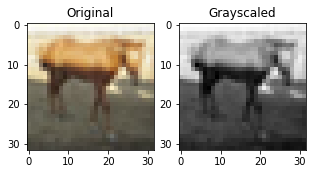

In [21]:
# we will use the methods from scikit-image library, hog() and rgb2gray().
from skimage.color import rgb2gray

# First convert the train and test features to grayscale
# The HOG method works for the gray scale image
hog_train = rgb2gray(train_features)
hog_test  = rgb2gray(test_features)

# Picking up the horse index from train_features
horse = train_features[2000]

# Plotting the original image
fig, ax = plt.subplots(1, 2, figsize=(5, 5))
ax[0].imshow(horse)
ax[0].set_title("Original")

# Plotting the coverted image for the selected index of horse
horse_gray = hog_train[2000]

# Plotting the gray scale image
ax[1].imshow(horse_gray, cmap='gray')
ax[1].set_title("Grayscaled");

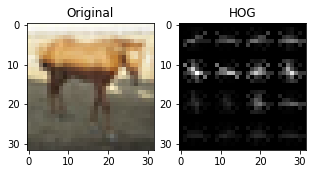

In [22]:
# We use the hog function from skimage.features directly. 
# So we don’t have to calculate the gradients, magnitude (total gradient) and orientation individually. 
# The hog function would internally calculate it and return the feature matrix.
from skimage.feature import hog

# Creating HOG feature Descriptor
# First we pass the the gray scale image of horse
# Set the parameter ‘visualize = True’, which return an image of the HOG
fd, hog_horse = hog(horse_gray, visualize=True)

# Plotting the original image
fig, ax = plt.subplots(1, 2, figsize=(5, 5))
ax[0].imshow(horse)
ax[0].set_title("Original")

# Plotting the HOG image
ax[1].imshow(hog_horse, cmap='gray')
ax[1].set_title("HOG");

From the above we can see the edges of the horse. Even it might be harder to identify a horse on the HOG image, compared to the original image, we can see that only the most important parts are preserved. 

In [23]:
# Joblib is an pacakge that can simply turn our Python code into parallel 
# computing mode and increases the computing speed
# with the Parallel and delayed functions from Joblib, we can simply configure a parallel run of the below function

from joblib import Parallel, delayed

# Function which converts the train and test images to hog images
def to_hog(images):
    return hog(images)

# Get to hog features from the train and test sets
# n_jobs is the number of parallel jobs.
# 'delayed(to_hog)(x) for x in hog_train' creates tuple of the function, x, and the parameters, one for each iteration. 
# Delayed creates these tuples, then Parallel will pass these to the interpreter.
# Parallel(n_jobs=num_cores) does the heavy lifting of multiprocessing. 
# Parallel forks the Python interpreter into a number of processes equal to the number of jobs. 
# Each process will run one iteration, and return the result.

hog_train = np.asarray(Parallel(n_jobs=-1)(delayed(to_hog)(x) for x in hog_train))
hog_test = np.asarray(Parallel(n_jobs=-1)(delayed(to_hog)(x) for x in hog_test))

In [24]:
# Check for the shape of hog train and test features
hog_train.shape, hog_test.shape, train_labels.shape, test_labels.shape

((50000, 324), (10000, 324), (50000,), (10000,))

In [25]:
# Select classes #7 and #8 to extract the HOG features
# Performing binary classification by selecting 2 classes from the data
# The class 7 belongs to 'horse' and class 8 belongs to 'ship'
X_train_hog, Y_train_hog = pick_2classes(7, 8, hog_train, train_labels)
X_test_hog, Y_test_hog = pick_2classes(7, 8, hog_test, test_labels)

In [26]:
# Check for the shape of HOG train and test features
X_train_hog.shape, X_test_hog.shape, Y_train_hog.shape, Y_test_hog.shape

((10000, 324), (2000, 324), (10000,), (2000,))

### Train the classifier and get the predictions

In [27]:
# Call the functions to train the classifier and get the predictions
trained_clf_hog = train(X_train_hog, Y_train_hog)
predictions_hog = predict(trained_clf_hog, X_test_hog)
# Calculate the accuracy
result = eval(predictions_hog, Y_test_hog)

In [28]:
# Print the accuracy on HOG features
print('Accuracy score of HOG features is:', result)

Accuracy score of HOG features is: 0.926


**observation:** From the above experiment, we observe that by using the HOG method we get a better representation of the features considering the important parts of the images. The accuracy for the HOG features is 92.6% using Linear Support Vector Classifier when compared to the original features directly passing to the classifier.

### Model Evaluation on HOG features

#### Classification Report

In [29]:
# Print the classification report
print(classification_report(Y_test_hog, predictions_hog))

              precision    recall  f1-score   support

           7       0.93      0.92      0.93      1000
           8       0.92      0.94      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



#### Confusion Matrix

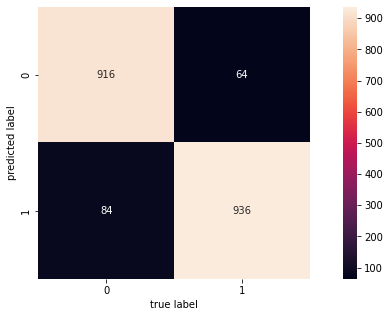

In [30]:
mat = confusion_matrix(Y_test_hog, predictions_hog)

plt.figure(figsize = (12,5))

# Visualizing the confusion matrix as a heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Multi-Class Classification using Kernelized SVMs on CIFAR-10 dataset

**Note:** For more details on RBF kernel refer to the following [link](https://colab.research.google.com/drive/1C59StkNs68wKZWwHxJeFbHjLxGCPynao?usp=sharing)

### Let's define a function to train the SVM using 'RBF' kernel

In [31]:
def train_kernel(train_features, train_labels):
    
    # Create an instance for the 'rbf' classifier
    clf = SVC(kernel='rbf', max_iter=1000)

    # Fitting the data to the model
    clf.fit(train_features, train_labels)

    return clf

### Let's define a function to extract 3 classes to perfrom Multi-class classification

In [32]:
# Function to extract 3 classes to perform SVM multi-class classification 
def pick_3classes(class0, class1, class2, X, Y):
    
    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]

    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]

    # Select class #2
    X_2 = X[Y == class2]
    Y_2 = Y[Y == class2]

    # Join the two classes (vertically row wise) to make the set
    X_classes = np.vstack((X_0, X_1, X_2))
    Y_classes = np.hstack((Y_0, Y_1, Y_2))

    return X_classes, Y_classes

In [33]:
# Select the classes #2, #9, #4 for training and testing the data to get the features
# The class 2 belongs to 'bird', class 9 belongs to 'truck' and class 4 belongs to 'deer'
X_train, Y_train = pick_3classes(2, 9, 4, train_features, train_labels)
X_test, Y_test = pick_3classes(2, 9, 4, test_features, test_labels)

In [34]:
# Check for the shape of train and test sets
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((15000, 32, 32, 3), (15000,), (3000, 32, 32, 3), (3000,))

In [35]:
# Reshape the data of train and test data sets before passing it to the model
X_train = X_train.flatten().reshape(15000, 3072)
X_test = X_test.flatten().reshape(3000, 3072)

The below code cell (for training the data with rbf kernel) takes around 5-7mins to complete it's execution

In [36]:
# Call the 'train' function with the train data
rbf_clf = train_kernel(X_train, Y_train)

# Call the 'predict' function by paasing the trained classifier and the test data
predictions_rbf = predict(rbf_clf, X_test)

# Calculate the accuracy by passing the predictions and the test labels
accuracy = eval(predictions_rbf, Y_test)

In [37]:
# Print the accuracy score
print('Accuracy score using rbf kernel is', accuracy)

Accuracy score using rbf kernel is 0.6926666666666667


### Let's define a function to extract 4 classes to perfrom Multi-class classification

You can uncomment the below code cell to perform the Multi-class classification on 4 classes (optional)

In [38]:
# Function to extract 4 classes to perform SVM multi-class classification 
# def pick_3classes(class0, class1, class2, class3, X, Y):
    
#     # Select class #0
#     X_0 = X[Y == class0]
#     Y_0 = Y[Y == class0]

#     # Select class #1
#     X_1 = X[Y == class1]
#     Y_1 = Y[Y == class1]

#     # Select class #2
#     X_2 = X[Y == class2]
#     Y_2 = Y[Y == class2]

#     # Select class #3
#     X_3 = X[Y == class3]
#     Y_3 = Y[Y == class3]

#     # Join the two classes (vertically row wise) to make the set
#     X_classes = np.vstack((X_0, X_1, X_2, X_3))
#     Y_classes = np.hstack((Y_0, Y_1, Y_2, Y_3))

#     return X_classes, Y_classes

# Select the classes #3, #6, #2, #7 for training and testing the data to get the features
# The class 3 belongs to 'cat', class 6 belongs to 'frog', class 2 belongs to 'bird' and class 7 belongs to 'horse'
# X_train, Y_train = pick_3classes(3, 6, 2, 7, train_features, train_labels)
# X_test, Y_test = pick_3classes(3, 6, 2, 7, test_features, test_labels)

# Reshape the data of train and test data sets before passing it to the model
# X_train = X_train.flatten().reshape(20000, 3072)
# X_test = X_test.flatten().reshape(4000, 3072)

### Extracting HOG features for 3 classes to perfrom Multi-class classification

In [39]:
# Select the classes #2, #9, #4 for training and testing the data to get the features
# The class 2 belongs to 'bird', class 9 belongs to 'truck' and class 4 belongs to 'deer'
X_train_hog_multi, Y_train_hog_multi = pick_3classes(2, 9, 4, hog_train, train_labels)
X_test_hog_multi, Y_test_hog_multi = pick_3classes(2, 9, 4, hog_test, test_labels)

In [40]:
# Check for the shape of train and test sets
X_train_hog_multi.shape, X_test_hog_multi.shape, Y_train_hog_multi.shape, Y_test_hog_multi.shape

((15000, 324), (3000, 324), (15000,), (3000,))

In [41]:
# Call the functions to train the classifier and using 'rbf' kernel and get the predictions

clf_hog = train_kernel(X_train_hog_multi, Y_train_hog_multi)

hog_predictions = predict(clf_hog, X_test_hog_multi)

result_score = eval(hog_predictions, Y_test_hog_multi)

In [42]:
# Print the accuracy score
print('Accuracy score using rbf kernel on HOG features is:', result_score)

Accuracy score using rbf kernel on HOG features is: 0.7976666666666666


### Model Evaluation for Multi-Class using HOG features

#### Classification Report

In [43]:
# Print the classification report
print(classification_report(Y_test_hog_multi, hog_predictions))

              precision    recall  f1-score   support

           2       0.78      0.69      0.73      1000
           4       0.71      0.80      0.75      1000
           9       0.92      0.91      0.91      1000

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



#### Confusion Matrix

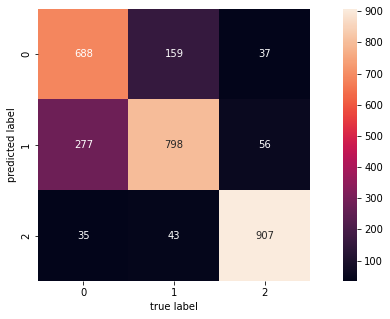

In [44]:
mat = confusion_matrix(Y_test_hog_multi, hog_predictions)

plt.figure(figsize = (12,5))

# Visualizing the confusion matrix as a heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Please answer the questions below to complete the experiment:


#### Consider the following statement about SVM and answer Q1.

A. SVM is a supervised machine learning algorithm, which cannot be used for classification but can be used for regression.

B. SVM is an unsupervised machine learning algorithm, which can be used for classification but not for regression.

C. SVM is a supervised machine learning algorithm, which can be used for classification as well as for regression.

D. SVM is an unsupervised machine learning algorithm, which can be used for classification as well as for regression.

In [45]:
#@title Q.1. Which of the following is true for a Support Vector Machine (SVM)?

Answer1 = "" #@param ["","Only A","Only C","Both A and C","Both B and D","All of the above"]


#### Consider the following statement about SVM Kernels and answer Q.2.

A. An SVM Kernel basically transforms lower dimensional data to higher dimensional space for easier segregation of the data.

B. An SVM Kernel transforms the linearly inseparable data (or non-linear data) in a lower dimension space into a linearly separable one by projecting it into a higher dimension space using the Kernel trick.

C. An SVM Kernel transforms the linearly inseparable data (or non-linear data) in a higher dimension space into a linearly separable one by projecting it into a lower dimension space using the Kernel trick.

In [46]:
#@title Q.2. Which of the following is true about the Kernel in Support Vector Machines?
Answer2 = "" #@param ["","Only A","Only B","Only C","Both A and C","Both A and B"]


In [47]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [48]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [49]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [50]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [51]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [52]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please answer Question 1
